In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/PawanKumar/ML Notes/AQI Project/Data/Real-Data/final_data_list.csv')

In [3]:
df.head()

,T,TM,Tm,H,VV,V,VM,PM2.5
0,8.9,15.0,5.0,93.0,0.5,4.8,11.1,284.795833
1,6.6,10.0,3.0,99.0,0.6,8.1,13.0,182.187500
2,7.8,14.0,3.0,79.0,1.6,11.7,18.3,223.208333
3,13.4,29.0,7.0,55.0,2.4,11.9,22.2,200.645833
4,15.2,21.0,10.0,88.0,0.6,8.9,18.3,285.225000


In [4]:
df = df.dropna()

In [5]:
df.isna().sum()

T        0
TM       0
Tm       0
H        0
VV       0
V        0
VM       0
PM2.5    0
dtype: int64

In [35]:
# Now making dependent and independent values
from sklearn.preprocessing import MinMaxScaler

X = df.iloc[:, :-1]  #Independent Feature
y = df.iloc[:, -1] #Dependent feature
# sns.distplot(np.sqrt(y))
# min_max= MinMaxScaler()
# X= min_max.fit_transform(X)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, random_state = 42, test_size = 0.30)
from sklearn import metrics

In [37]:
import xgboost
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)

[21:40:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PawanKumar\Anaconda1\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [38]:
XGB.score(X_train, y_train).round(4), XGB.score(X_test, y_test).round(4)
# So, from the rsult we can certainly say that there is over-fitting condition.

(0.854, 0.6631)

In [39]:
#Using croos-validation 
from sklearn.model_selection import cross_val_score
score = cross_val_score(XGB, X, y, cv = 5)

C:\Users\PawanKumar\Anaconda1\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\PawanKumar\Anaconda1\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\PawanKumar\Anaconda1\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:40:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:40:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PawanKumar\Anaconda1\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\PawanKumar\Anaconda1\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [40]:
score.mean().round(4)

0.6009

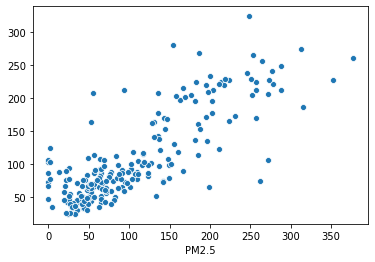

In [41]:
sns.scatterplot(y_test, y_pred)

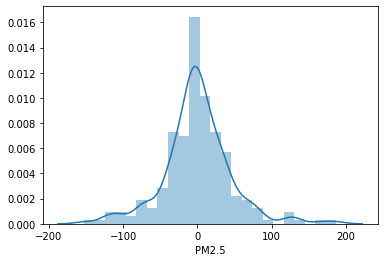

In [42]:
sns.distplot(y_test-y_pred)

# Hyperparameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
XGBRegressor()

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [44]:
parameters = {
              'max_depth':[None,1,3,5,10,12,15,20],
                      'max_leaf_nodes':[None, 10,20,30,40,50,60,80,100],
                      'min_child_weight':[1,3,5,8,10],
                      'subsample':[0,0.1,0.4,0.3,0.6,1]
             ,'learning_rate':[0.005, 0.010, 0.050, 0.10, 0.15, 0.25, 0.35, 0.50, 1.0]}

In [45]:
random_search = RandomizedSearchCV(XGB, param_distributions=parameters,cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [46]:
random_search.fit(X_train,y_train)

[21:40:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\PawanKumar\Anaconda1\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   param_distributions={'learning_rate': [0.005, 0.01, 0.05,
                                                          0.1, 0.15, 0.25, 0.35,
                              

In [29]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=1, max_leaf_nodes=80, min_child_weight=1, missing=None,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.6, verbosity=1)

In [47]:
y_prediction = random_search.predict(X_test)

In [48]:
metrics.r2_score(y_test, y_prediction), random_search.best_score_

(0.6545963165066212, -2344.5609691900418)

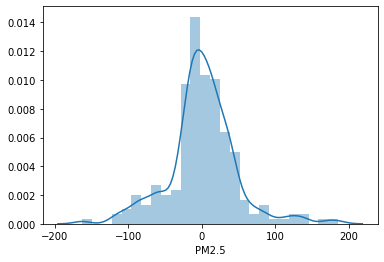

In [49]:
sns.distplot(y_test-y_prediction)

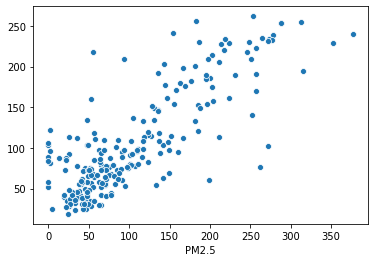

In [50]:
sns.scatterplot(y_test, y_prediction)

In [51]:
# Saving to pickle file
import pickle

In [52]:
file = open('xgb_model.pkl', 'wb')
pickle.dump(random_search, file)

In [53]:
metrics.mean_squared_error(y_test, y_prediction)

2191.909836031423

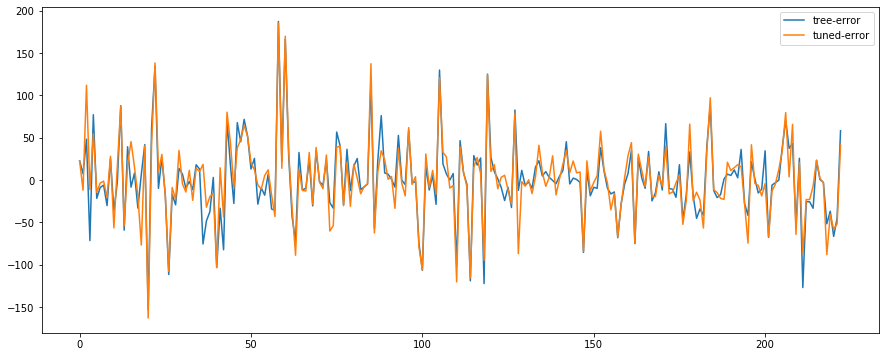

In [55]:
plt.figure(figsize=(15,6))
c= [i for i in range(len(y_test))]
# plt.plot(c, y_test)
# plt.plot(c, y_prediction)
# plt.plot(c,y_pred)
plt.plot(c, y_test-y_pred, label='tree-error')
plt.plot(c, y_test-y_prediction, label='tuned-error')
plt.legend()